In [4]:
#load data
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
import plotly.graph_objects as go




In [5]:
def get_college_football_week():
    # Define the start date of the college football season
    start_date = datetime(2023, 8, 26) 

    # Get the current date
    current_date = datetime.today()

    # Calculate the difference in days from the start date
    days_difference = (current_date - start_date).days

    # Calculate the week based on a 7-day week
    college_football_week = (days_difference // 7) + 1
    
    if college_football_week>16:
        college_football_week=16
        

    return int(college_football_week-1)

In [6]:
#read data with Pandas from CSV file

NCAA_df = pd.read_csv("data/defense.csv")

In [7]:
#see a few data
NCAA_df.head()

,Player,School,POS,SOLO,AST,TOT,SACK,YDS,PD,INT,LNG,TD,FF
0,Jason Henderson,ODU,LB,41,98,139,4.0,23,0,0,0,0,0
1,Tyrice Knight,UTEP,LB,71,45,116,3.5,0,5,0,0,0,0
2,Jay Higgins,IOWA,LB,49,64,113,1.0,15,2,1,0,0,1
3,Joe Sparacio,EMU,LB,45,61,106,2.0,0,2,0,0,0,2
4,Payton Wilson,NCSU,LB,48,57,105,4.0,2,5,2,15,1,0


In [8]:


# Group the data by 'School' and sum the 'SOLO' column for each group
school_solo_totals = NCAA_df.groupby('School')['SOLO'].sum().reset_index()

# Sort the result in descending order by the 'SOLO' column
school_solo_totals = school_solo_totals.sort_values(by='SOLO', ascending=False)


# Display the total number of solo tackles by school (from most to least)
print(school_solo_totals)

    School  SOLO
115    USC   440
23    COLO   431
44    JVST   409
108     UL   399
104    UCF   386
..     ...   ...
124     VT   262
66    NCSU   261
117    USM   256
57    MICH   242
74    OHIO   217

[133 rows x 2 columns]


In [9]:
#put this in a bell curve
# Group the data by 'School' and sum the 'TOT' column for each group
school_tot_totals = NCAA_df.groupby('School')['TOT'].sum().reset_index()

# Sort the result in descending order by the 'TOT' column
school_tot_totals = school_tot_totals.sort_values(by='TOT', ascending=False)
# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)


# Display the total number of tackles by school (from most to least)
print(school_tot_totals)

    School  TOT
73     ODU  823
25     CSU  781
44    JVST  735
109    ULM  724
123    VAN  717
28     EMU  706
29     FAU  692
62    MSST  684
51      LT  683
118    USU  682
40    IOWA  677
26    DUKE  677
91     SYR  672
59    MISS  672
115    USC  670
7     ARST  663
108     UL  657
102   TXST  656
61    MRSH  653
79      OU  645
71    NMSU  644
97    TLSA  640
128    WKU  635
36      GT  634
80    PITT  633
64    MTSU  631
94     TEM  631
50     LSU  630
16     BYU  630
2      ALA  630
53    MASS  629
63     MSU  626
130    WSU  623
30     FIU  622
17     CAL  622
43     JMU  620
103    UAB  619
67      ND  619
98     TOL  615
24    CONN  614
120   UTEP  613
111   UNLV  612
113    UNT  612
121   UTSA  609
52    M-OH  605
39     ILL  605
1      AKR  605
100    TTU  605
85      SC  605
132    WYO  605
122    UVA  600
66    NCSU  599
37     HAW  596
23    COLO  595
110    UNC  595
72      NU  595
77    ORST  594
104    UCF  594
83    RICE  593
126   WASH  592
35    GAST  592
127    W

(array([ 2., 11., 23., 45., 29., 11.,  7.,  3.,  1.,  1.]),
 array([447. , 484.6, 522.2, 559.8, 597.4, 635. , 672.6, 710.2, 747.8,
        785.4, 823. ]),
 <BarContainer object of 10 artists>)

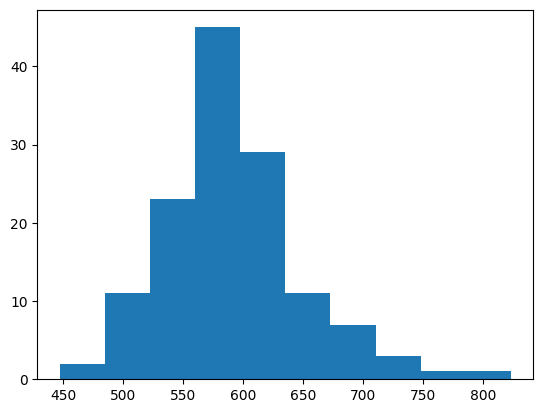

In [10]:


# Display the plot
plt.hist(school_tot_totals['TOT'])

/tmp/ipykernel_1298/4189999064.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(school_tot_totals['TOT'])


<Axes: xlabel='TOT', ylabel='Density'>

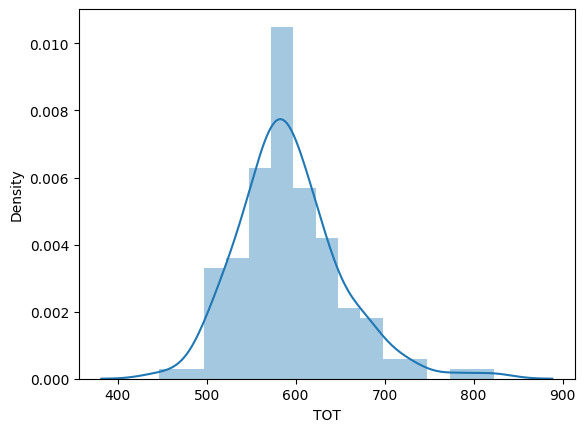

In [11]:
sns.distplot(school_tot_totals['TOT'])

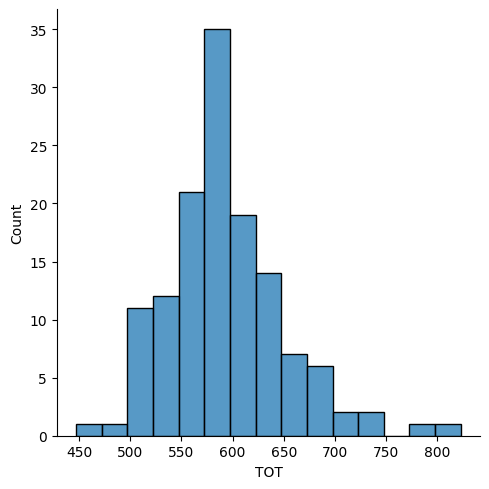

In [12]:
sns.displot(school_tot_totals['TOT'])

In [13]:

def TotHist():
    # Group the data by 'School' and sum the 'TOT' column for each group
    school_tot_totals = NCAA_df.groupby('School')['TOT'].sum().reset_index()

    # Sort the result in descending order by the 'TOT' column
    school_tot_totals = school_tot_totals.sort_values(by='TOT', ascending=False)

   
    # Create an interactive distribution plot using Plotly Express
    fig = px.histogram(
        school_tot_totals,
        x='TOT',
        title='Distribution of Total Tackles by School',
        labels={'TOT': 'Total Tackles', 'count': 'Number of Schools'},
        marginal='box',  # Display a box plot on the marginal axis
        opacity=0.7,  # Adjust the opacity of bars
        color_discrete_sequence=['blue'],  # Bar color
        nbins=20  # Adjust the number of bins for a smoother curve
    )

    # Customize the layout
    fig.update_layout(
        xaxis_title='Total Tackles',
        yaxis_title='Number of Schools',
        xaxis=dict(range=[school_tot_totals['TOT'].min(), school_tot_totals['TOT'].max()]),  # Set x-axis range
    )

    # Show the interactive plot
    fig.show()



In [14]:
def IntBySchool(t1, t2, t3, t4, t5, t6):
    # Group the data by 'School' and sum the 'INT' column for each group
    school_int_totals = NCAA_df.groupby('School')['INT'].sum().reset_index()

    # Sort the result in descending order by the 'INT' column
    school_int_totals = school_int_totals.sort_values(by='INT', ascending=False)

    # Create a bar chart using Plotly Express
    fig = px.bar(
        school_int_totals,
        x='School',
        y='INT',
        title='Total Interceptions by School',
        labels={'INT': 'Total Interceptions', 'School': 'School'},
        color='INT',  # Color bars based on the number of interceptions
        color_continuous_scale='reds',  # Use a red color scale
        range_color=[school_int_totals['INT'].min(), school_int_totals['INT'].max()],  # Match color scale range to data
    )

    # Customize the layout
    fig.update_layout(
        xaxis_title='School',
        yaxis_title='Total Interceptions',
        coloraxis_colorbar_title='Total Interceptions',
        coloraxis_colorbar_ticks='outside',
        coloraxis_colorbar_tickmode='array',
        coloraxis_colorbar_tickvals=[school_int_totals['INT'].min(), school_int_totals['INT'].max()],
        coloraxis_colorbar_ticktext=['Low', 'High'],
    )

    # Update layout with dotted lines based on user input
    def update_dotted_lines(selected_schools):
        shapes = []
        annotations = []

        for school in selected_schools:
            # Check if the selected school is in the data
            if school in school_int_totals['School'].values:
                color = 'black'  # Use black for existing schools
            else:
                color = 'red'  # Use red for non-existing schools

            shape = {
                'type': 'line',
                'x0': school,
                'x1': school,
                'y0': 0,
                'y1': 1,
                'xref': 'x',
                'yref': 'paper',
                'line': {'dash': 'dash', 'color': color},
            }
            shapes.append(shape)

            annotation = {
                'x': school,
                'y': 1.05,  # Adjust the y-coordinate for the annotation
                'xref': 'x',
                'yref': 'paper',
                'text': school,
                'showarrow': False,
                'font': {'size': 10},
            }
            annotations.append(annotation)

        return shapes, annotations

    # Specify the schools you want lines for
    selected_schools = [t1, t2, t3, t4, t5, t6]  # Replace with your selected schools

    # Add lines and annotations for all selected schools
    shapes, annotations = update_dotted_lines(selected_schools)
    fig.update_layout(shapes=shapes, annotations=annotations)

    # Show the interactive plot
    fig.show()
    
   


In [15]:
def TotPlacement(t1, t2, t3, t4, t5, t6):
    """
    Create an interactive distribution plot of total tackles for selected schools.

    Parameters:
    - school_tot_totals: DataFrame with 'School' and 'TOT' columns.
    - t1, t2, t3, t4, t5, t6: Names of schools to highlight.

    Returns:
    - None (displays the interactive plot).
    """
    # Group the data by 'School' and sum the 'TOT' column for each group
    school_tot_totals = NCAA_df.groupby('School')['TOT'].sum().reset_index()

    # Sort the result in descending order by the 'TOT' column
    school_tot_totals = school_tot_totals.sort_values(by='TOT', ascending=False)

    # Create a distribution plot using Plotly Express
    fig = px.histogram(
        school_tot_totals,
        x='TOT',
        marginal='rug',  # Add rug plot for individual data points
        color_discrete_sequence=['orange'],  # Set the color for the histogram bars
        labels={'TOT': 'Total Tackles'},
        title='Distribution of Total Tackles for All Schools',
        nbins=30,  # Number of bins for the histogram
    )

    # Add vertical lines and annotations for each team's total tackles
    team_colors = {'red': t1, 'black': t2, 'blue': t3, 'green': t4, 'lightblue': t5, 'lime': t6}

    for color, team in team_colors.items():
        if team in school_tot_totals['School'].values:
            total_tackles = school_tot_totals.loc[school_tot_totals['School'] == team, 'TOT'].values[0]
            fig.add_shape(
                type='line',
                x0=total_tackles,
                x1=total_tackles,
                y0=0,
                y1=0.8,
                xref='x',
                yref='paper',
                line=dict(color=color, dash='dash'),
            )
            
            # Add annotation for the school name
            fig.add_annotation(
                x=total_tackles,
                y=1.05,  # Adjust the y-coordinate for the annotation
                xref='x',
                yref='paper',
                text=team,
                showarrow=False,
                font=dict(size=10),
            )

    # Add hover text for each school
    fig.update_traces(hovertext=school_tot_totals['School'])

    # Customize the layout
    fig.update_layout(
        xaxis_title='Total Tackles',
        yaxis_title='Density',
        showlegend=False,  # Do not show legend for histogram bars
    )

    # Display the interactive plot
    fig.show()


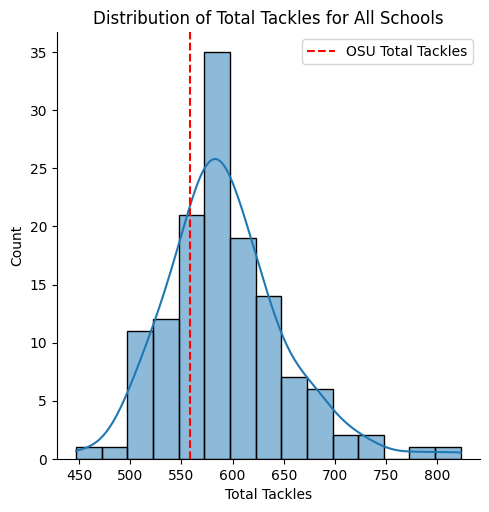

In [16]:
# Create a distribution plot
sns.displot(school_tot_totals['TOT'], kde=True)

# Find and set the total tackles for OSU
osu_total_tackles = school_tot_totals.loc[school_tot_totals['School'] == 'OSU', 'TOT'].values[0]

# Add a vertical line for OSU's total tackles
plt.axvline(x=osu_total_tackles, color='red', linestyle='--', label='OSU Total Tackles')

# Add labels and title
plt.xlabel('Total Tackles')
plt.ylabel('Count')
plt.title('Distribution of Total Tackles for All Schools')

# Show a legend
plt.legend()

# Display the plot
plt.show()

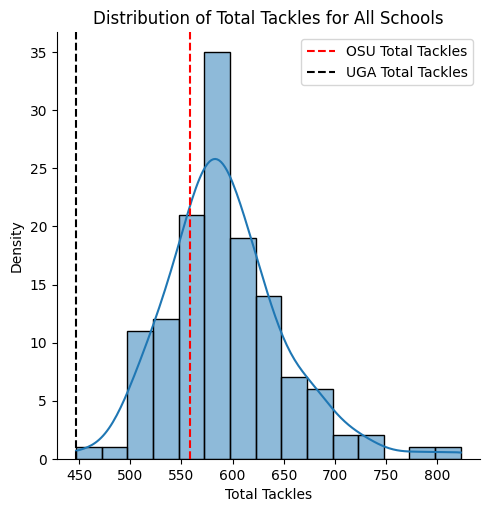

In [17]:

# Create a distribution plot
sns.displot(school_tot_totals['TOT'], kde=True)

# Find and set the total tackles for OSU and UGA
osu_total_tackles = school_tot_totals.loc[school_tot_totals['School'] == 'OSU', 'TOT'].values[0]
uga_total_tackles = school_tot_totals.loc[school_tot_totals['School'] == 'UGA', 'TOT'].values[0]


# Add vertical lines for OSU and UGA's total tackles
plt.axvline(x=osu_total_tackles, color='red', linestyle='--', label='OSU Total Tackles')
plt.axvline(x=uga_total_tackles, color='Black', linestyle='--', label='UGA Total Tackles')

# Add labels and title
plt.xlabel('Total Tackles')
plt.ylabel('Density')
plt.title('Distribution of Total Tackles for All Schools')

# Show a legend
plt.legend()

# Display the plot
plt.show()

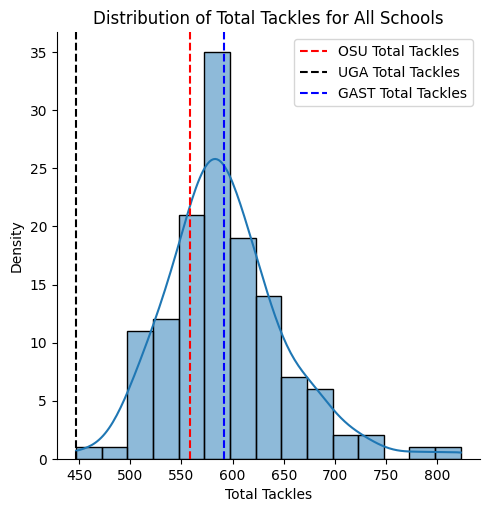

In [18]:
# Create a distribution plot
sns.displot(school_tot_totals['TOT'], kde=True)

# Find and set the total tackles for OSU and UGA
osu_total_tackles = school_tot_totals.loc[school_tot_totals['School'] == 'OSU', 'TOT'].values[0]
uga_total_tackles = school_tot_totals.loc[school_tot_totals['School'] == 'UGA', 'TOT'].values[0]
gast_total_tackles = school_tot_totals.loc[school_tot_totals['School'] == 'GAST', 'TOT'].values[0]

# Add vertical lines for OSU and UGA's total tackles
plt.axvline(x=osu_total_tackles, color='red', linestyle='--', label='OSU Total Tackles')
plt.axvline(x=uga_total_tackles, color='Black', linestyle='--', label='UGA Total Tackles')
plt.axvline(x=gast_total_tackles, color='Blue', linestyle='--', label='GAST Total Tackles')

# Add labels and title
plt.xlabel('Total Tackles')
plt.ylabel('Density')
plt.title('Distribution of Total Tackles for All Schools')

# Show a legend
plt.legend()

# Display the plot
plt.show()

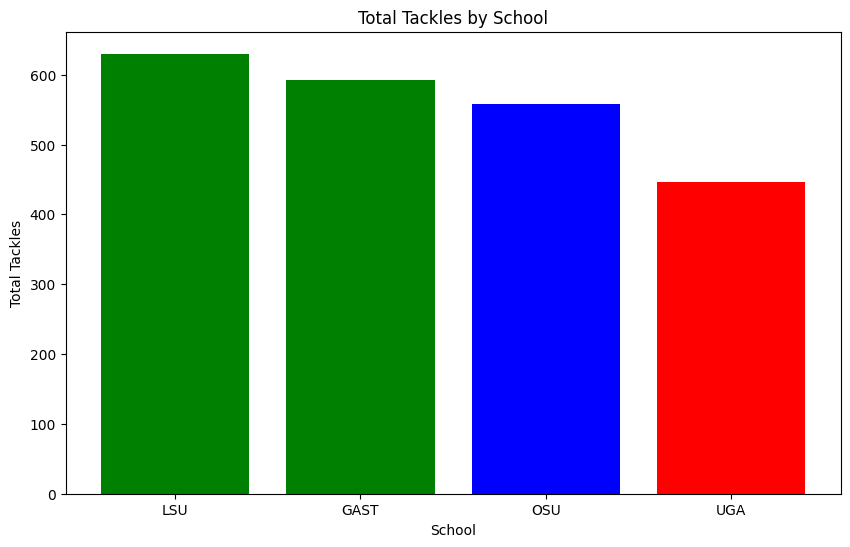

In [19]:
# Filter the data for specific schools (LSU, GAST, UGA, OSU)
selected_schools = ['LSU', 'GAST', 'UGA', 'OSU']
filtered_data = NCAA_df[NCAA_df['School'].isin(selected_schools)]

# Group the filtered data by 'School' and sum the 'TOT' column for each group
school_tot_totals = filtered_data.groupby('School')['TOT'].sum().reset_index()

# Sort the result in descending order by the 'TOT' column
school_tot_totals = school_tot_totals.sort_values(by='TOT', ascending=False)

# Calculate the TOT value for OSU
osu_tot = school_tot_totals[school_tot_totals['School'] == 'OSU']['TOT'].values[0]

# Define a function to determine the color based on the difference in TOT
def get_color(tot, selected_tot):
    if tot == selected_tot:
        return 'blue'  # Selected team is blue
    elif tot > selected_tot:
        return 'green'  # Teams with more tackles than the selected team
    else:
        return 'red'  # Teams with fewer tackles than the selected team

# Create a list of colors based on the difference in TOT
colors = [get_color(tot, osu_tot) for tot in school_tot_totals['TOT']]

# Create a bar graph with color-coded bars
plt.figure(figsize=(10, 6))
plt.bar(school_tot_totals['School'], school_tot_totals['TOT'], color=colors)
plt.xlabel('School')
plt.ylabel('Total Tackles')
plt.title('Total Tackles by School')

plt.show()

#The data shows up that the team with least amount of TOT is better. I assume this is because the team has more #3 and outs. 
#If some data will not correspond with this assumption is because the team is getting scored on at a fast rate.

In [20]:
# Group the data by 'School' and sum the 'SACK' column for each group
school_sack_totals = NCAA_df.groupby('School')['SACK'].sum().reset_index()

# Sort the result in descending order by the 'SACK' column
school_sack_totals = school_sack_totals.sort_values(by='SACK', ascending=False)

# Display the total number of sacks by school (from most to least)
print(school_sack_totals)

    School  SACK
43     JMU  41.0
81     PSU  38.0
92    TA&M  34.0
105   UCLA  34.0
44    JVST  33.0
121   UTSA  32.0
59    MISS  31.0
89     SMU  31.0
124     VT  31.0
77    ORST  30.0
95    TENN  30.0
119   UTAH  29.0
56     MIA  29.0
2      ALA  29.0
76     ORE  28.0
68     NEB  28.0
82     PUR  27.0
60     MIZ  27.0
66    NCSU  27.0
54      MD  27.0
108     UL  27.0
102   TXST  26.0
80    PITT  25.0
52    M-OH  25.0
25     CSU  25.0
61    MRSH  25.0
63     MSU  25.0
5      ARK  25.0
71    NMSU  25.0
33     FSU  25.0
127    WIS  24.0
115    USC  24.0
117    USM  24.0
104    UCF  23.0
49     LOU  23.0
4     ARIZ  23.0
107     UK  23.0
120   UTEP  23.0
29     FAU  23.0
23    COLO  23.0
101   TULN  23.0
98     TOL  23.0
110    UNC  23.0
57    MICH  22.0
91     SYR  22.0
96     TEX  22.0
93     TCU  22.0
74    OHIO  22.0
8      ASU  22.0
3      APP  21.5
129    WMU  21.0
128    WKU  21.0
114    USA  21.0
58    MINN  21.0
62    MSST  21.0
0      AFA  21.0
13    BGSU  21.0
32    FRES  21

In [21]:
def plot_sack_totals_interactive( highlight_teams):
    """
    Plot the total number of sacks by school in an interactive bar chart.

    Parameters:
    - school_sack_totals: DataFrame with 'School' and 'SACK' columns.
    - highlight_teams: List of teams to highlight in the chart.

    Returns:
    - None (displays the interactive plot).
    
    """
        # Group the data by 'School' and sum the 'TOT' column for each group
    school_sack_totals = NCAA_df.groupby('School')['SACK'].sum().reset_index()

    # Sort the result in descending order by the 'TOT' column
    school_sack_totals = school_sack_totals.sort_values(by='SACK', ascending=False)

    # Highlight specified teams in a different color
    school_sack_totals['Color'] = school_sack_totals['School'].apply(lambda x: 'orange' if x in highlight_teams else 'skyblue')

    # Create an interactive bar chart using plotly express
    fig = px.bar(
        school_sack_totals,
        x='School',
        y='SACK',
        color='Color',
        labels={'SACK': 'Total Sacks'},
        title='Total Number of Sacks by School',
        text='SACK',  # Display the sack totals on top of bars
    )

    # Customize the layout for better readability
    fig.update_layout(
        xaxis_title='School',
        yaxis_title='Total Sacks',
        xaxis=dict(tickangle=45),
    )

    # Display the interactive plot
    fig.show()




In [22]:
# Group the data by 'School' and sum the 'TD' column for each group
school_td_totals = NCAA_df.groupby('School')['TD'].sum().reset_index()

# Sort the result in descending order by the 'TD' column
school_td_totals = school_td_totals.sort_values(by='TD', ascending=False)

# Display the total number of interceptions by school (from most to least)
print(school_td_totals)

    School  TD
57    MICH   4
34    GASO   3
47      KU   3
20    CLEM   3
5      ARK   3
107     UK   3
95    TENN   3
89     SMU   3
78     OSU   3
0      AFA   2
67      ND   2
53    MASS   2
55     MEM   2
61    MRSH   2
79      OU   2
69     NEV   2
27     ECU   2
91     SYR   2
118    USU   2
119   UTAH   2
123    VAN   2
126   WASH   2
130    WSU   2
29     FAU   2
66    NCSU   2
15    BUFF   2
3      APP   2
18     CCU   2
12      BC   1
77    ORST   1
115    USC   1
16     BYU   1
109    ULM   1
1      AKR   1
108     UL   1
106    UGA   1
73     ODU   1
103    UAB   1
75    OKST   1
76     ORE   1
13    BGSU   1
26    DUKE   1
80    PITT   1
81     PSU   1
100    TTU   1
85      SC   1
86    SDSU   1
99    TROY   1
98     TOL   1
96     TEX   1
9      AUB   1
92    TA&M   1
56     MIA   1
93     TCU   1
43     JMU   1
128    WKU   1
41     ISU   1
42      IU   1
35    GAST   1
127    WIS   1
33     FSU   1
21     CLT   1
39     ILL   1
48     LIB   1
30     FIU   1
50     LSU

In [23]:
#upcoming week
# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Read the CSV file with the specified encoding
NCAA_df2 = pd.read_csv(f'data/week{get_college_football_week()-1}.csv', encoding='ISO-8859-1')

# Display the entire DataFrame
print(NCAA_df2)

                Away Team           Home Team      Time           TV  \
0              Ball State  @Northern Illinois   7:00 PM          NaN   
1        Central Michigan   @Western Michigan   7:00 PM          NaN   
2                    Ohio            @Buffalo   7:30 PM          NaN   
3                   Akron         @Miami (OH)   7:00 PM          NaN   
4           Bowling Green         @Kent State   7:00 PM          NaN   
5        Eastern Michigan             @Toledo   7:30 PM          NaN   
6                Virginia       @13Louisville   7:30 PM          NaN   
7           Southern Miss          @Louisiana   7:30 PM          NaN   
8             North Texas                @SMU   9:00 PM          NaN   
9                 Wyoming               @UNLV  10:45 PM          FS1   
10              3Michigan       @11Penn State  12:00 PM          FOX   
11               8Alabama           @Kentucky  12:00 PM          NaN   
12             Texas Tech           @21Kansas  12:00 PM         

In [24]:
# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Read the CSV file with the specified encoding
NCAA_df1 = pd.read_csv(f'data/week{get_college_football_week()-2}.csv', encoding='ISO-8859-1')

# Display the entire DataFrame
print(NCAA_df1)





                  Team            Opo Team Away Team  Away Team Score  \
0    Northern Illinois   @Central Michigan       CMU               37   
1              Buffalo             @Toledo       TOL               31   
2           Ball State      @Bowling Green      BGSU               24   
3           Kent State              @Akron       AKR               31   
4                  TCU         @Texas Tech       TTU               35   
5          Wake Forest               @Duke      DUKE               24   
6        South Alabama               @Troy      TROY               28   
7       Boston College           @Syracuse        BC               17   
8       Colorado State            @Wyoming       WYO               24   
9          1Ohio State            @Rutgers       OSU               35   
10          12Missouri           @2Georgia       UGA               30   
11              Purdue          @3Michigan      MICH               41   
12      4Florida State         @Pittsburgh       FS

In [25]:
#find who teams will be playing in following week

In [26]:
print(NCAA_df1.head())
# Filter the DataFrame to include rows where Georgia was either the Away Team or Home Team
georgia_games = NCAA_df1[(NCAA_df1['Away Team'] == 'UGA') | (NCAA_df1['Home Team'] == 'UGA')]

# Display the games in which Georgia played
georgia_games[['Away Team', 'Away Team Score', 'Home Team', 'Home Team Score']]


                Team           Opo Team Away Team  Away Team Score Home Team  \
0  Northern Illinois  @Central Michigan       CMU               37       NIU   
1            Buffalo            @Toledo       TOL               31      BUFF   
2         Ball State     @Bowling Green      BGSU               24      BALL   
3         Kent State             @Akron       AKR               31      KENT   
4                TCU        @Texas Tech       TTU               35       TCU   

   Home Team Score    PassingLeader  PassingLeaderScore    RushingLeader  \
0               31   Rocky Lombardi                 298     Marion Lukes   
1               13      Dequan Finn                 176       Peny Boone   
2               21   Connor Bazelak                 128   Terion Stewart   
3               27  Lorenzo Lingard                 106  Chrishon McCray   
4               28      Josh Hoover                 353      Tahj Brooks   

   RushingLeaderScore  ReceivingLeader  ReceivingLeaderScore  

,Away Team,Away Team Score,Home Team,Home Team Score
10,UGA,30,MIZ,21


In [27]:
# Define the range of weeks you want to consider
start_week = 0
end_week = get_college_football_week() - 2

# Create an empty list to store DataFrames for each week
all_georgia_games = []

# Iterate through the specified weeks
for week in range(start_week, end_week + 1):
    file_path = f'data/week{week}.csv'
    # Load data for the current week with the specified encoding
    current_week_data = pd.read_csv(file_path, encoding='ISO-8859-1')

    # Filter the games involving Georgia and append to the list
    georgia_games = current_week_data[(current_week_data['Away Team'] == 'UGA') | (current_week_data['Home Team'] == 'UGA')]
    all_georgia_games.append(georgia_games[['Team','Away Team', 'Away Team Score', 'Home Team', 'Home Team Score','PassingLeader','PassingLeaderScore']])

# Concatenate all DataFrames to create a single DataFrame
result_df = pd.concat(all_georgia_games)

# Display all Georgia games
print(result_df)

              Team Away Team  Away Team Score Home Team  Home Team Score  \
24       UT Martin       UGA               48       UTM                7   
3       Ball State       UGA               45      BALL                3   
5   South Carolina       UGA               24        SC               14   
5              UAB       UGA               49       UAB               21   
7         1Georgia       UGA               27       AUB               20   
6       20Kentucky       UGA               51        UK               13   
10        1Georgia       UGA               37       VAN               20   
7         1Georgia       UGA               43       FLA               20   
10      12Missouri       UGA               30       MIZ               21   

   PassingLeader  PassingLeaderScore  
24   Carson Beck                 294  
3    Carson Beck                 283  
5    Carson Beck                 269  
5    Carson Beck                 338  
7    Carson Beck                 313  
6    

In [28]:
def Score_Diff(away_team1,away_team2 ):
    # Define the range of weeks you want to consider
    start_week = 0
    end_week = get_college_football_week() - 2

    # Create an empty list to store DataFrames for each week
    all_team_games = []

    # Assuming school_td_totals['School'] is a list of teams
    for team in [away_team1, away_team2]:
        # Iterate through the specified weeks
        for week in range(start_week, end_week + 1):
            file_path = f'data/week{week}.csv'
            # Load data for the current week with the specified encoding
            current_week_data = pd.read_csv(file_path, encoding='ISO-8859-1')

            # Filter the games involving the current team and append to the list
            team_games = current_week_data[current_week_data['Away Team'] == team].copy()
            team_games['Score Difference'] = team_games['Away Team Score'] - team_games['Home Team Score']
            
            # Add the week information to the DataFrame
            team_games['Week'] = week

            all_team_games.append(team_games[['Team', 'Away Team', 'Away Team Score', 'Home Team', 'Home Team Score', 'Score Difference', 'Week']])

    # Concatenate all DataFrames to create a single DataFrame for all teams
    all_teams_result_df = pd.concat(all_team_games)

    # Plotting the line chart for all teams using plotly
    fig = px.line(all_teams_result_df, x='Week', y='Score Difference', color='Home Team', markers=True,
                title='Week-by-Week Score Difference for Selected Teams',
                labels={'Score Difference': 'Score Difference', 'Week': 'Week'})
                


    # Add annotations for the 'Away Team' names
    for index, row in all_teams_result_df.iterrows():
        vs_team = row['Away Team']
        fig.add_annotation(x=row['Week'], y=row['Score Difference'], text=vs_team,
                        showarrow=True, arrowhead=4, ax=0, ay=-40)

    # Update the legend item for "Home Team" to "vs"
    fig.update_layout(legend_title_text='vs')

    # Show the plot
    fig.show()


In [29]:
def PassLeader_Score_Diff(team1,team2):
    start_week = 0
    end_week = get_college_football_week() - 2

    # Create an empty list to store DataFrames for each team
    selected_teams_passing_leader = []

    # Iterate through the specified weeks
    for week in range(start_week, end_week + 1):
        file_path = f'data/week{week}.csv'
        # Load data for the current week with the specified encoding
        current_week_data = pd.read_csv(file_path, encoding='ISO-8859-1')

        # Filter the games involving the selected teams and append to the list
        team1_games = current_week_data[((current_week_data['Away Team'] == team1) | (current_week_data['Home Team'] == team1)) &
                                        ~current_week_data['PassingLeader'].isna()].copy()
        
        team2_games = current_week_data[((current_week_data['Away Team'] == team2) | (current_week_data['Home Team'] == team2)) &
                                        ~current_week_data['PassingLeader'].isna()].copy()

        # Add the week information to the DataFrame
        team1_games['Week'] = team2_games['Week'] = week

        selected_teams_passing_leader.append(team1_games[['Away Team', 'Home Team', 'PassingLeader', 'PassingLeaderScore', 'Week']])
        selected_teams_passing_leader.append(team2_games[['Away Team', 'Home Team', 'PassingLeader', 'PassingLeaderScore', 'Week']])

    # Concatenate all DataFrames to create a single DataFrame for selected teams
    selected_teams_passing_leader_df = pd.concat(selected_teams_passing_leader)

    # Plotting the line chart for PassingLeaderScore over the weeks for selected teams using plotly
    fig_selected_teams = px.line(selected_teams_passing_leader_df, x='Week', y='PassingLeaderScore', color='PassingLeader', markers=True,
                                title=f'PassingLeaderScore Over Weeks for {team1} and {team2}',
                                labels={'PassingLeaderScore': 'PassingLeaderScore', 'Week': 'Week'},
                                hover_data={'Away Team', 'Home Team', 'Week'})

    # Rename the 'Home Team' and 'Away Team' columns to 'vs' and 'Team' respectively
    fig_selected_teams.update_traces(hovertemplate='Week: %{x}<br>Team: %{customdata[1]}<br>vs: %{customdata[0]}<br>PassingLeaderScore: %{y}')

    # Show the plot for PassingLeaderScore over weeks for selected teams with 'vs' and 'Team' in the hover tooltip
    fig_selected_teams.show()
    
    
    
   # Concatenate all DataFrames to create a single DataFrame for selected teams
    selected_teams_passing_leader_df = pd.concat(selected_teams_passing_leader)

    # Sort the DataFrame by 'PassingLeaderScore' column in ascending order
    selected_teams_passing_leader_df.sort_values(by='PassingLeaderScore', ascending=True, inplace=True)

    # Assuming selected_teams_passing_leader_df is your DataFrame
    leader_counts = selected_teams_passing_leader_df.groupby(['Away Team', 'PassingLeader']).size().reset_index(name='Count')

    # Filter the counts for Team1 and Team2
    team1_counts = leader_counts[leader_counts['Away Team'] == team1]
    team2_counts = leader_counts[leader_counts['Away Team'] == team2]

    # Get the PassingLeader with the highest count for Team1 and Team2
    team1_highest_count_leader = team1_counts.loc[team1_counts['Count'].idxmax(), 'PassingLeader']
    team2_highest_count_leader = team2_counts.loc[team2_counts['Count'].idxmax(), 'PassingLeader']

    # Get the row with the highest PassingLeaderScore for the most frequent PassingLeader from Team1 and Team2
    team1_highest_score_row = selected_teams_passing_leader_df[(selected_teams_passing_leader_df['Away Team'] == team1) &
                                                                (selected_teams_passing_leader_df['PassingLeader'] == team1_highest_count_leader)].nlargest(1, 'PassingLeaderScore')
    team2_highest_score_row = selected_teams_passing_leader_df[(selected_teams_passing_leader_df['Away Team'] == team2) &
                                                                (selected_teams_passing_leader_df['PassingLeader'] == team2_highest_count_leader)].nlargest(1, 'PassingLeaderScore')


    # Extract Home Team names
    team1_highest_home_team = team1_highest_score_row['Home Team'].values[0]
    team2_highest_home_team = team2_highest_score_row['Home Team'].values[0]
    

    # Get the row with the lowest PassingLeaderScore for the least frequent PassingLeader from Team1 and Team2
    team1_lowest_score_row = selected_teams_passing_leader_df[(selected_teams_passing_leader_df['Away Team'] == team1) &
                                                                (selected_teams_passing_leader_df['PassingLeader'] == team1_highest_count_leader)].nsmallest(1, 'PassingLeaderScore')

    team2_lowest_score_row = selected_teams_passing_leader_df[(selected_teams_passing_leader_df['Away Team'] == team2) &
                                                                (selected_teams_passing_leader_df['PassingLeader'] == team2_highest_count_leader)].nsmallest(1, 'PassingLeaderScore')

    team1_lowest_home_team = team1_lowest_score_row['Home Team'].values[0]
    team2_lowest_home_team = team2_lowest_score_row['Home Team'].values[0]

    print(team1, team2, team2_highest_home_team, team1_highest_home_team, team2_lowest_home_team, team1_lowest_home_team)
    # Call IntBySchool with Home Team names
    IntBySchool(team1, team2, team2_highest_home_team, team1_highest_home_team, team2_lowest_home_team, team1_lowest_home_team)
    # Example usage:

    TotPlacement(team1, team2, team2_highest_home_team, team1_highest_home_team, team2_lowest_home_team, team1_lowest_home_team)
    highlight_teams=[team1, team2, team2_highest_home_team, team1_highest_home_team, team2_lowest_home_team, team1_lowest_home_team]
    plot_sack_totals_interactive( highlight_teams)
    #TotPlacement(team1,team2,team1_lowest_home_team, team2_lowest_home_team, team1_highest_home_team, team2_highest_home_team)
    #print(team1, team2, team2_highest_home_team, team1_highest_home_team, team2_lowest_home_team, team1_lowest_home_team)

(for this data above ^)The True home team is the team who name is under Team

now we want to Calculate point difference for each game below.


In [30]:

def RushLeader_Score_Diff(team1,team2):
    # Define the range of weeks you want to consider
    start_week = 0
    end_week = get_college_football_week() - 2

    # Create an empty list to store DataFrames for each team
    selected_teams_rushing_leader = []

    # Iterate through the specified weeks
    for week in range(start_week, end_week + 1):
        file_path = f'data/week{week}.csv'
        # Load data for the current week with the specified encoding
        current_week_data = pd.read_csv(file_path, encoding='ISO-8859-1')

        # Filter the games involving the selected teams and append to the list
        team1_games = current_week_data[(current_week_data['Away Team'] == team1) &
                                        ~current_week_data['RushingLeader'].isna()].copy()
        
        team2_games = current_week_data[(current_week_data['Away Team'] == team2)  &
                                        ~current_week_data['RushingLeader'].isna()].copy()

        # Add the week information to the DataFrame
        team1_games['Week'] = team2_games['Week'] = week

        selected_teams_rushing_leader.append(team1_games[['Away Team', 'Home Team', 'RushingLeader', 'RushingLeaderScore', 'Week']])
        selected_teams_rushing_leader.append(team2_games[['Away Team', 'Home Team', 'RushingLeader', 'RushingLeaderScore', 'Week']])

    # Concatenate all DataFrames to create a single DataFrame for selected teams
    selected_teams_rushing_leader_df = pd.concat(selected_teams_rushing_leader)

    # Plotting the line chart for PassingLeaderScore over the weeks for selected teams using plotly
    fig_selected_teams = px.line(selected_teams_rushing_leader_df, x='Week', y='RushingLeaderScore', color='RushingLeader', markers=True,
                                title=f'RushingLeaderScore Over Weeks for {team1} and {team2}',
                                labels={'RushingLeaderScore': 'RushingLeaderScore', 'Week': 'Week'},
                                hover_data={'Away Team', 'Home Team', 'Week'})

    # Rename the 'Home Team' and 'Away Team' columns to 'vs' and 'Team' respectively
    fig_selected_teams.update_traces(hovertemplate='Week: %{x}<br>Team: %{customdata[1]}<br>vs: %{customdata[0]}<br>RushingLeaderScore: %{y}')

    # Show the plot for PassingLeaderScore over weeks for selected teams with 'vs' and 'Team' in the hover tooltip
    fig_selected_teams.show()


In [33]:
Score_Diff('CLEM','GT')
RushLeader_Score_Diff('CLEM','GT')
PassLeader_Score_Diff('CLEM','GT')

TotHist()


CLEM GT SCST CHSO UVA FAU


In [ ]:
#overall stats about data
NCAA_df.describe()

,SOLO,AST,TOT,SACK,YDS,PD,INT,LNG,TD,FF
count,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000
mean,7.828066,6.419541,14.247607,0.487538,5.300524,0.723858,0.185299,2.030883,0.019686,0.161459
std,9.449557,8.260857,16.678659,1.126095,12.791386,1.475889,0.570513,8.975296,0.145286,0.461615
min,0.000000,0.000000,0.000000,0.000000,-10.000000,0.000000,0.000000,-10.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,10.000000,21.000000,0.500000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,71.000000,98.000000,139.000000,15.500000,167.000000,17.000000,7.000000,100.000000,2.000000,5.000000
